In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [57]:
data = pd.read_csv('bank-full.csv',  sep=";")
data.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [58]:
y = data['y']
X = data.loc[:,:"poutcome":]

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 14)

In [60]:
class_features = X.select_dtypes(include=['object']).columns
numeric_features = X.select_dtypes(include=['int64']).columns

In [61]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

In [62]:
class_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

In [63]:
preprocessor = ColumnTransformer(
    transformers = [
        ('num', numeric_transformer, numeric_features),
        ('cla', class_transformer, class_features)
    ])

In [64]:
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression(random_state=14))])

In [65]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')),
                                                 ('cla',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object'))])),
                ('classifier', LogisticRegression(random_state=14))])

In [78]:
y_predicted = model.predict(X_test)
report = classification_report(y_test, y_predicted)

print(report)

              precision    recall  f1-score   support

          no       0.92      0.97      0.95      3985
         yes       0.65      0.37      0.47       537

    accuracy                           0.90      4522
   macro avg       0.79      0.67      0.71      4522
weighted avg       0.89      0.90      0.89      4522



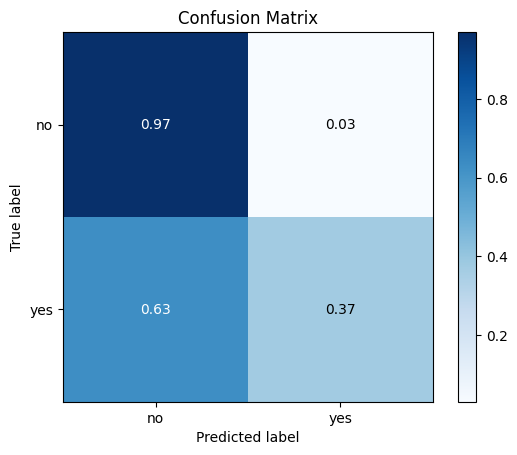

In [79]:
import matplotlib.pyplot as plt
from scikitplot.metrics import plot_confusion_matrix, plot_roc

plot_confusion_matrix(y_test, y_predicted, normalize = 'True')
plt.title('Confusion Matrix')
plt.show()